In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Hotel_df = pd.read_excel('SHG_Booking_Data.xlsx')

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
Hotel_df.dtypes

Booking ID                       int64
Hotel                           object
Booking Date            datetime64[ns]
Arrival Date            datetime64[ns]
Lead Time                        int64
Nights                           int64
Guests                           int64
Distribution Channel            object
Customer Type                   object
Country                         object
Deposit Type                    object
Avg Daily Rate                 float64
Status                          object
Status Update           datetime64[ns]
Cancelled (0/1)                  int64
Revenue                        float64
Revenue Loss                   float64
dtype: object

In [5]:
Hotel_df['Month']=Hotel_df['Booking Date'].dt.month

In [6]:
Hotel_df['Month'] = Hotel_df['Booking Date'].dt.strftime('%B') 

In [7]:
Hotel_df['Year'] = Hotel_df['Booking Date'].dt.year

In [8]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015


In [9]:
Hotel_df['Day'] = Hotel_df['Booking Date'].dt.strftime('%A')

In [10]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year,Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014,Thursday
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013,Monday
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Wednesday
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Thursday
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015,Wednesday


## 1a.Trends in booking patterns over time

**for Year on Year**

In [11]:
 Book_Count = Hotel_df.groupby('Year')['Booking ID'].count().reset_index()

In [12]:
Book_Count

,Year,Booking ID
0,2013,1
1,2014,2636
2,2015,31645
3,2016,58543
4,2017,26565


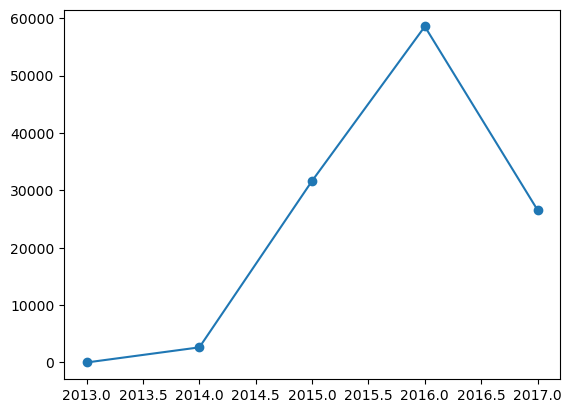

In [13]:
plt.plot(Book_Count['Year'], Book_Count['Booking ID'], marker='o', linestyle='-')

**Month in each Year**

In [14]:
Month_Count =     Hotel_df.groupby(['Year', 'Month'])['Booking ID'].count().reset_index()

In [15]:
Month_Count

,Year,Month,Booking ID
0,2013,June,1
1,2014,April,4
2,2014,August,5
3,2014,July,3
4,2014,June,2
5,2014,March,1
6,2014,November,68
7,2014,October,2535
8,2014,September,18
9,2015,April,942


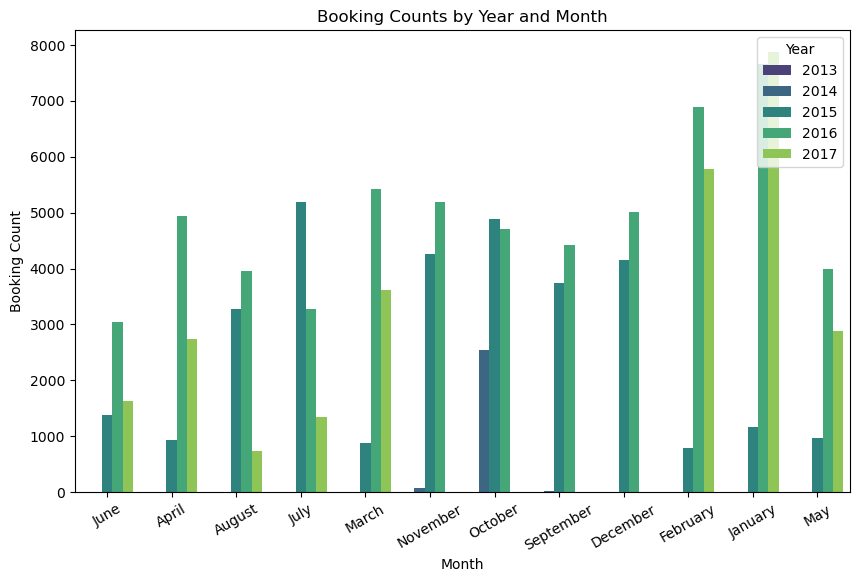

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Booking ID', hue='Year', data=Month_Count, palette='viridis')
plt.title('Booking Counts by Year and Month')
plt.xlabel('Month')
plt.xticks(rotation = 30)
plt.ylabel('Booking Count')
plt.legend(title='Year', loc='upper right')
plt.show()

   ## 1b.Lead Time vs Booking Channels

In [17]:
 Dist_channel = Hotel_df.groupby('Distribution Channel')['Lead Time'].sum().reset_index()

In [18]:
Dist_channel

,Distribution Channel,Lead Time
0,Corporate,299866
1,Direct,846911
2,Offline Travel Agent,3252826
3,Online Travel Agent,8018205
4,Undefined,115


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Offline Travel Agent'),
  Text(3, 0, 'Online Travel Agent'),
  Text(4, 0, 'Undefined')])

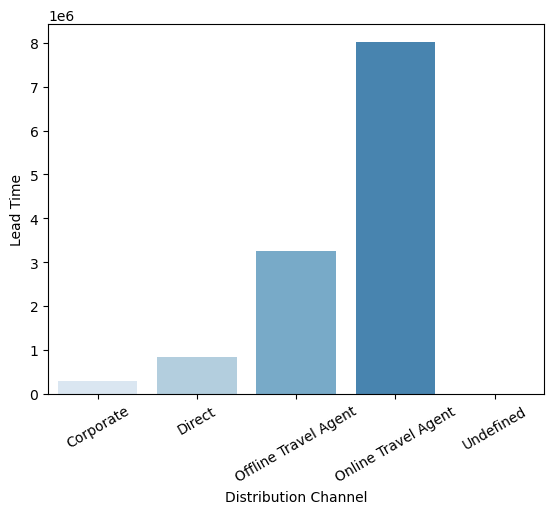

In [19]:
sns.barplot(data = Dist_channel, x= Dist_channel['Distribution Channel'] , y =Dist_channel['Lead Time'], palette='Blues')
plt.xticks(rotation = 30)

**Correlation between lead Time and Customer Type**

In [20]:
corr_dif = Hotel_df.groupby('Customer Type')['Lead Time'].sum().reset_index()

In [21]:
corr_dif

,Customer Type,Lead Time
0,Contract,582745
1,Group,31768
2,Transient,8360491
3,Transient-Party,3442919


In [22]:
?sns.boxplot

<Axes: xlabel='Customer Type', ylabel='Lead Time'>

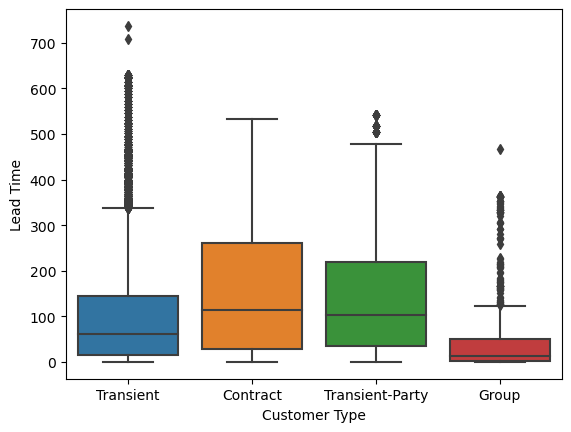

In [23]:
sns.boxplot( x=Hotel_df['Customer Type'], y=Hotel_df['Lead Time'],data= Hotel_df,)

In [24]:
corr_eff = Hotel_df.groupby('Customer Type')['Lead Time'].mean().reset_index()

In [25]:
corr_eff

,Customer Type,Lead Time
0,Contract,142.969823
1,Group,55.057192
2,Transient,93.295515
3,Transient-Party,137.037056


In [26]:
Hotel_df.dtypes

Booking ID                       int64
Hotel                           object
Booking Date            datetime64[ns]
Arrival Date            datetime64[ns]
Lead Time                        int64
Nights                           int64
Guests                           int64
Distribution Channel            object
Customer Type                   object
Country                         object
Deposit Type                    object
Avg Daily Rate                 float64
Status                          object
Status Update           datetime64[ns]
Cancelled (0/1)                  int64
Revenue                        float64
Revenue Loss                   float64
Month                           object
Year                             int32
Day                             object
dtype: object

In [27]:
corr_eff['Customer Type'] = corr_eff['Customer Type'].astype('category').cat.codes

In [28]:
correlation = corr_eff['Customer Type'].corr(corr_eff['Lead Time'])

**From the correlation below, we see that, there is a weak correlation between 'customer Type' and 'Lead Time'**

In [29]:
correlation

0.06411413223261474

## Question 2a.

In [30]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year,Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014,Thursday
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013,Monday
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Wednesday
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Thursday
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015,Wednesday


In [31]:
Dist_chan = Hotel_df.groupby('Distribution Channel')['Booking ID'].count()

**We can see that Offline Travel Agents contributed more to bookings**

In [32]:
Dist_chan

Distribution Channel
Corporate                6677
Direct                  14645
Offline Travel Agent    23991
Online Travel Agent     74072
Undefined                   5
Name: Booking ID, dtype: int64

**Average Daily Rate**

In [33]:
Diff_DA = Hotel_df.groupby('Distribution Channel')['Avg Daily Rate'].sum()

In [34]:
Diff_DA

Distribution Channel
Corporate                462884.39
Direct                  1561962.22
Offline Travel Agent    2090706.35
Online Travel Agent     8041833.44
Undefined                   231.20
Name: Avg Daily Rate, dtype: float64

## Q2b

In [35]:
coun_guest = Hotel_df.groupby('Country')[['Guests', 'Revenue']].sum().reset_index()

**We can compare to see how much revenue each guests from their respective countries, benefited in revenue**

In [36]:
coun_guest

,Country,Guests,Revenue
0,Albania,26,1874.60
1,Algeria,187,29502.70
2,American Samoa,1,195.00
3,Andorra,17,1866.70
4,Angola,699,63137.22
5,Anguilla,2,87.82
6,Antarctica,5,727.56
7,Argentina,433,53162.28
8,Armenia,15,2314.90
9,Aruba,4,526.50


## Q3a

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
features = ['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Revenue', 'Revenue Loss']


In [39]:
Hotel_df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss', 'Month', 'Year', 'Day'],
      dtype='object')

In [40]:
correlation_matrix =Hotel_df[features + ['Cancelled (0/1)']].corr()


In [41]:
correlation_matrix

,Lead Time,Nights,Guests,Avg Daily Rate,Revenue,Revenue Loss,Cancelled (0/1)
Lead Time,1.000000,0.157167,0.072265,-0.063077,0.045773,-0.055487,0.293123
Nights,0.157167,1.000000,0.115463,0.067945,0.496060,-0.368046,0.017779
Guests,0.072265,0.115463,1.000000,0.368105,0.155087,-0.181168,0.046522
Avg Daily Rate,-0.063077,0.067945,0.368105,1.000000,0.363388,-0.291212,0.047557
Revenue,0.045773,0.496060,0.155087,0.363388,1.000000,0.326817,-0.424228
Revenue Loss,-0.055487,-0.368046,-0.181168,-0.291212,0.326817,1.000000,-0.517136
Cancelled (0/1),0.293123,0.017779,0.046522,0.047557,-0.424228,-0.517136,1.000000


<Axes: >

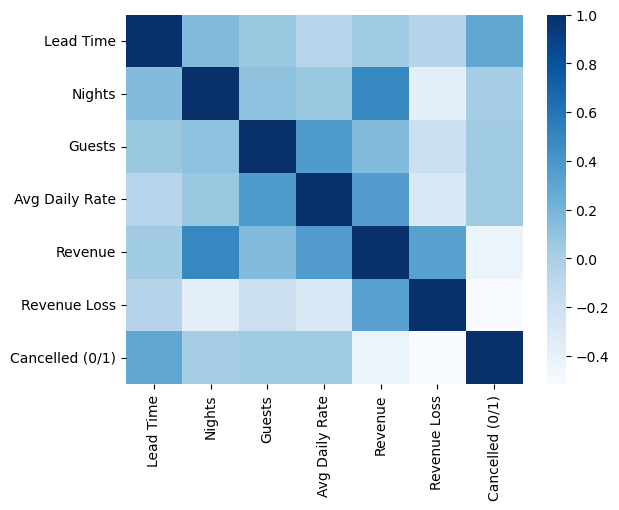

In [42]:
sns.heatmap(data=correlation_matrix, cmap='Blues')

**We can see that it is imposible to predict any cancelations due to their weak correlation**

## Q3b

**By Customer Type**

In [43]:
Hotel_df[Hotel_df['Cancelled (0/1)'] == 0].groupby('Customer Type')['Revenue'].sum()


Customer Type
Contract            1484917.13
Group                123355.10
Transient          19332636.95
Transient-Party     5055351.23
Name: Revenue, dtype: float64

**By Distribution channel**

In [44]:
Hotel_df[Hotel_df['Cancelled (0/1)'] == 0].groupby('Distribution Channel')['Revenue'].sum()

Distribution Channel
Corporate                 827884.92
Direct                   4325241.68
Offline Travel Agent     5625863.79
Online Travel Agent     15216706.52
Undefined                    563.50
Name: Revenue, dtype: float64

## Q4a

**Revenue over time**

In [45]:
trend_revenue = Hotel_df.groupby('Month')['Revenue'].sum().reset_index()

In [46]:
trend_revenue

,Month,Revenue
0,April,2304492.64
1,August,2079692.80
2,December,2110388.32
3,February,3396665.64
4,January,4291393.52
5,July,2442651.57
6,June,1914472.79
7,March,2631187.90
8,May,2117964.00
9,November,2067076.26


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

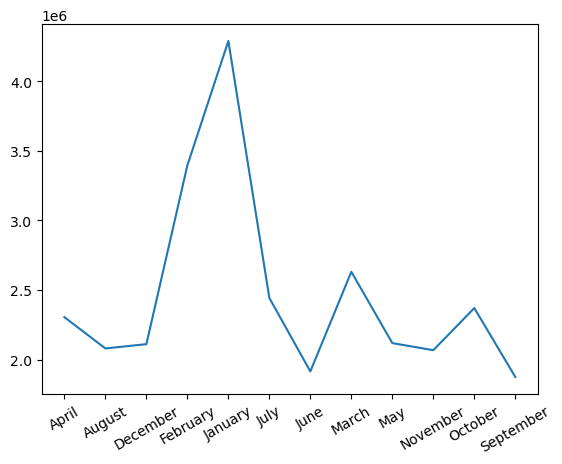

In [47]:
plt.plot(trend_revenue['Month'],trend_revenue['Revenue'])
plt.xticks(rotation = 30)

**Customer Type on Revenue**

In [48]:
Hotel_df.groupby('Customer Type')['Revenue'].sum()

Customer Type
Contract            1555189.13
Group                123355.10
Transient          22696813.88
Transient-Party     5225239.33
Name: Revenue, dtype: float64

**Country on Revenue**

In [49]:
Hotel_df.groupby('Country')['Revenue'].sum()

Country
Albania                            1874.60
Algeria                           29502.70
American Samoa                      195.00
Andorra                            1866.70
Angola                            63137.22
Anguilla                             87.82
Antarctica                          727.56
Argentina                         53162.28
Armenia                            2314.90
Aruba                               526.50
Australia                        122729.62
Austria                          363980.79
Azerbaijan                         3682.80
Bahamas                             354.60
Bahrain                             379.80
Bangladesh                         1520.75
Barbados                            895.00
Belarus                            5793.04
Belgium                          682121.28
Benin                                 0.00
Bolivia                            3381.53
Bosnia and Herzegovina             2934.90
Botswana                            310.50
Bra

## Q4b

In [50]:
Hotel_df['Avg Daily Rate'].value_counts()

Avg Daily Rate
 62.00      3754
 75.00      2715
 90.00      2473
 65.00      2418
 0.00       1959
 80.00      1889
 95.00      1661
 120.00     1607
 100.00     1573
 85.00      1538
 110.00     1525
 60.00      1313
 130.00     1275
 48.00      1123
 115.00     1080
 70.00      1044
 99.00       905
 140.00      866
 126.00      852
 108.00      818
 170.00      759
 160.00      748
 89.00       747
 68.00       725
 105.00      722
 135.00      675
 79.20       620
 89.10       606
 117.00      566
 62.80       565
 109.00      564
 88.00       560
 72.00       529
 94.50       509
 79.00       489
 66.00       484
 98.00       482
 96.00       475
 55.00       472
 101.50      459
 67.00       459
 58.00       455
 125.00      445
 81.00       431
 74.80       423
 35.00       420
 107.10      420
 40.00       418
 76.50       417
 50.00       408
 80.75       389
 104.00      383
 78.00       380
 150.00      379
 64.00       370
 84.00       367
 130.50      366
 30.00       365

In [51]:
Hotel_df.groupby(['Customer Type', 'Distribution Channel'])['Avg Daily Rate'].mean()

Customer Type    Distribution Channel
Contract         Corporate                45.962963
                 Direct                   56.589474
                 Offline Travel Agent     79.965435
                 Online Travel Agent      94.543311
Group            Corporate                80.135484
                 Direct                   91.376724
                 Offline Travel Agent     75.658421
                 Online Travel Agent      87.223529
Transient        Corporate                67.647262
                 Direct                  109.500936
                 Offline Travel Agent     85.632719
                 Online Travel Agent     114.338523
                 Undefined               112.700000
Transient-Party  Corporate                72.278440
                 Direct                   91.701555
                 Offline Travel Agent     91.761443
                 Online Travel Agent      84.248436
                 Undefined                29.625000
Name: Avg Daily Rate, dtyp

<Axes: xlabel='Customer Type', ylabel='Avg Daily Rate'>

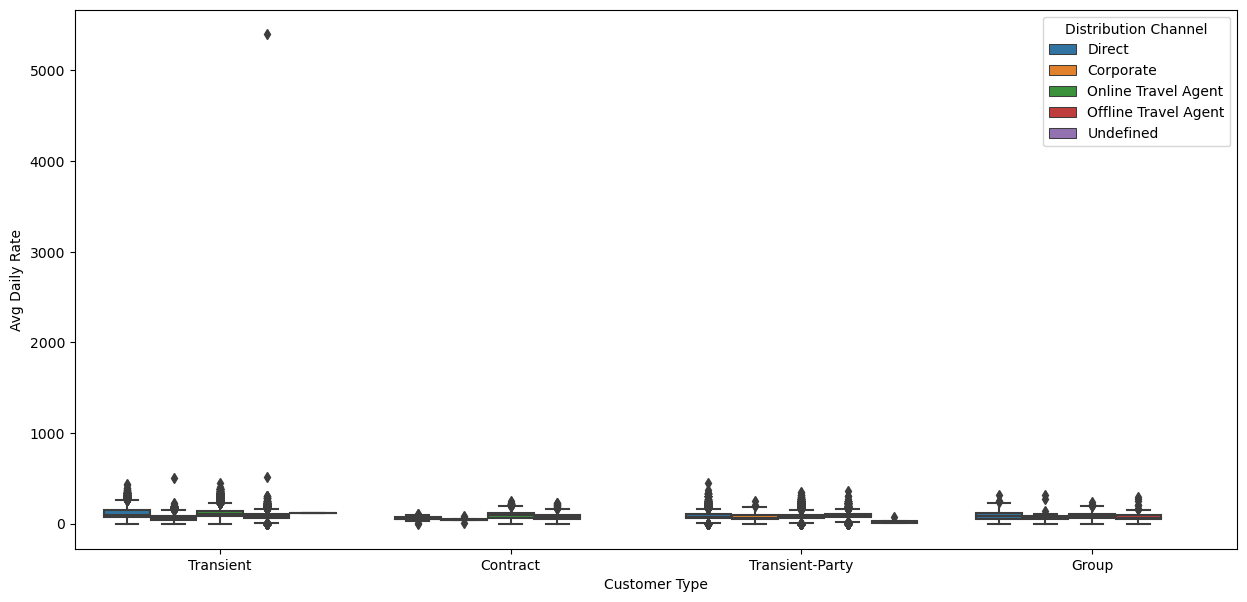

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x=Hotel_df['Customer Type'], y=Hotel_df['Avg Daily Rate'], hue = Hotel_df['Distribution Channel'])

## Q5a

In [53]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year,Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014,Thursday
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013,Monday
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Wednesday
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Thursday
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015,Wednesday


In [65]:
country = Hotel_df.groupby('Country')['Guests'].sum()

In [57]:
country['Country'].values

array(['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Polynesia',
       'French Southern Territories', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Greece', 'Guadeloupe', 'Guatemala',
       'Guernsey', 'Guinea-Bissau', 'Guyana', 'H

In [63]:
names =['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Polynesia',
       'French Southern Territories', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Greece', 'Guadeloupe', 'Guatemala',
       'Guernsey', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Latvia', 'Lebanon', 'Libyan Arab Jamahiriya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao', 'Macedonia', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania',
       'Mauritius', 'Mayotte', 'Mexico', 'Monaco', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'San Marino', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone',
       'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland',
       'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'Togo', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Viet Nam', 'Virgin Islands',
       'Zambia', 'Zimbabwe']

([<matplotlib.patches.Wedge at 0x28dbce0ad10>,
 [Text(1.0999999331294157, 0.0003835560991648169, 'Albania'),
  Text(1.0999943495396884, 0.0035257596001160144, 'Algeria'),
  Text(1.0999819638865422, 0.006299136790534503, 'American Samoa'),
  Text(1.0999804112316796, 0.006564671094993507, 'Andorra'),
  Text(1.0998666650288382, 0.017126562945950687, 'Angola'),
  Text(1.099657054433216, 0.027465662840416957, 'Anguilla'),
  Text(1.0996544711834784, 0.027568895628674654, 'Antarctica'),
  Text(1.0994735599132741, 0.03402779821898732, 'Argentina'),
  Text(1.099249272704168, 0.040632947953080166, 'Armenia'),
  Text(1.099238883337311, 0.040913046321943244, 'Aruba'),
  Text(1.0986838316486767, 0.05379440559930506, 'Australia'),
  Text(1.0950967855601415, 0.10374502521010673, 'Austria'),
  Text(1.090892239543082, 0.1412590588411198, 'Azerbaijan'),
  Text(1.09082391282879, 0.14178572283868537, 'Bahamas'),
  Text(1.0907972726621606, 0.1419905276868559, 'Bahrain'),
  Text(1.090726681408739, 0.1425317

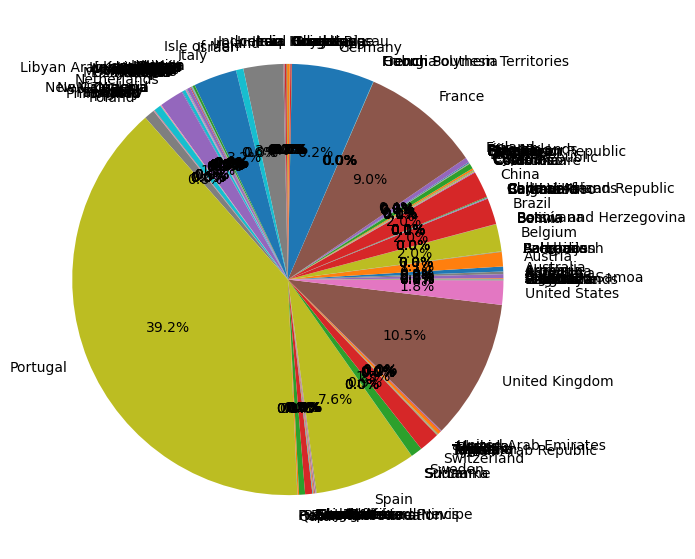

In [66]:
plt.figure(figsize=(15,7))
plt.pie(country, labels=names, autopct='%1.1f%%')

**We can see from the above that portugal should be the target market**

## Q5b

**Correlation between country and cancelation or extended stay**

In [67]:
Hotel_df['Status'].value_counts()

Status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

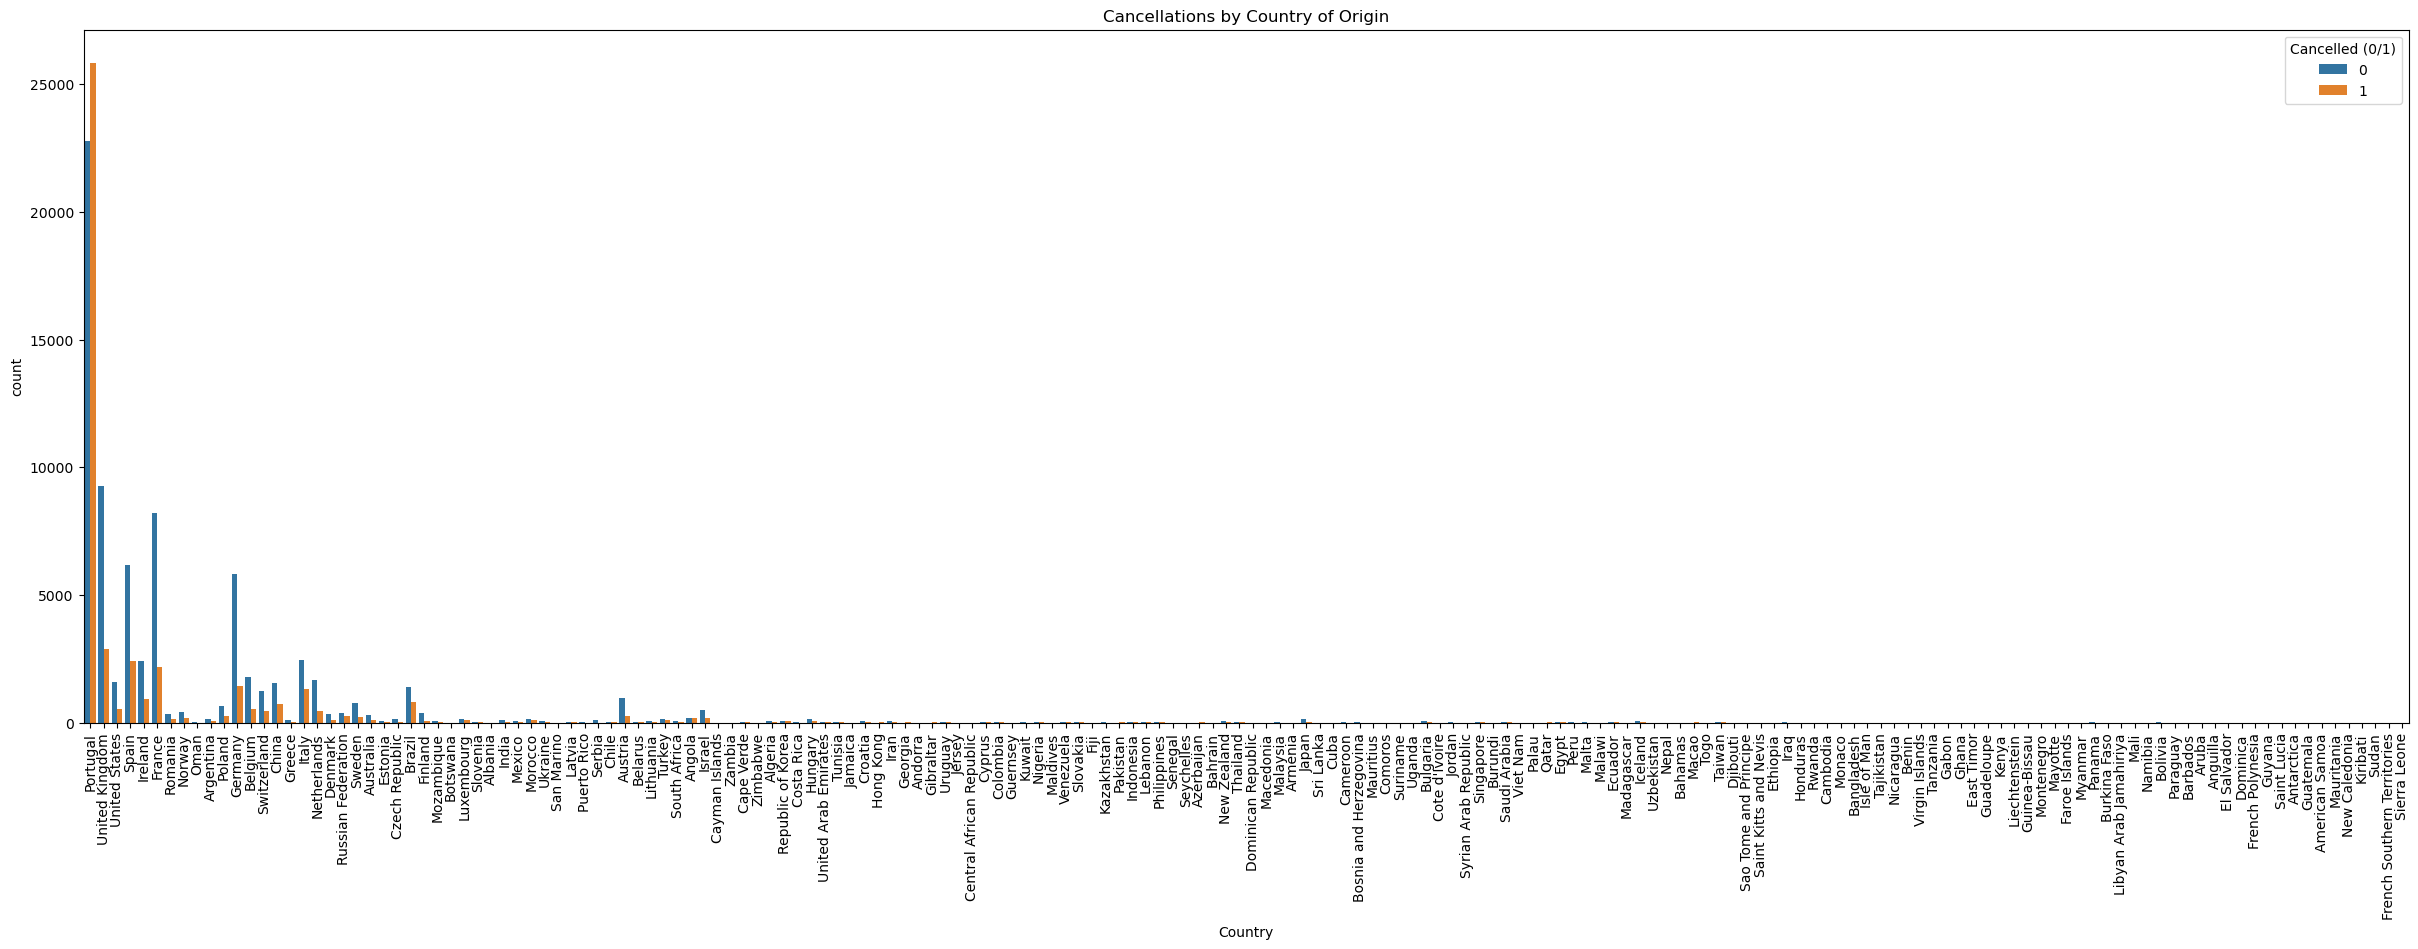

In [68]:
plt.figure(figsize=(30,9))
sns.countplot(x='Country', hue='Cancelled (0/1)', data=Hotel_df)
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Cancellations by Country of Origin')
plt.show()

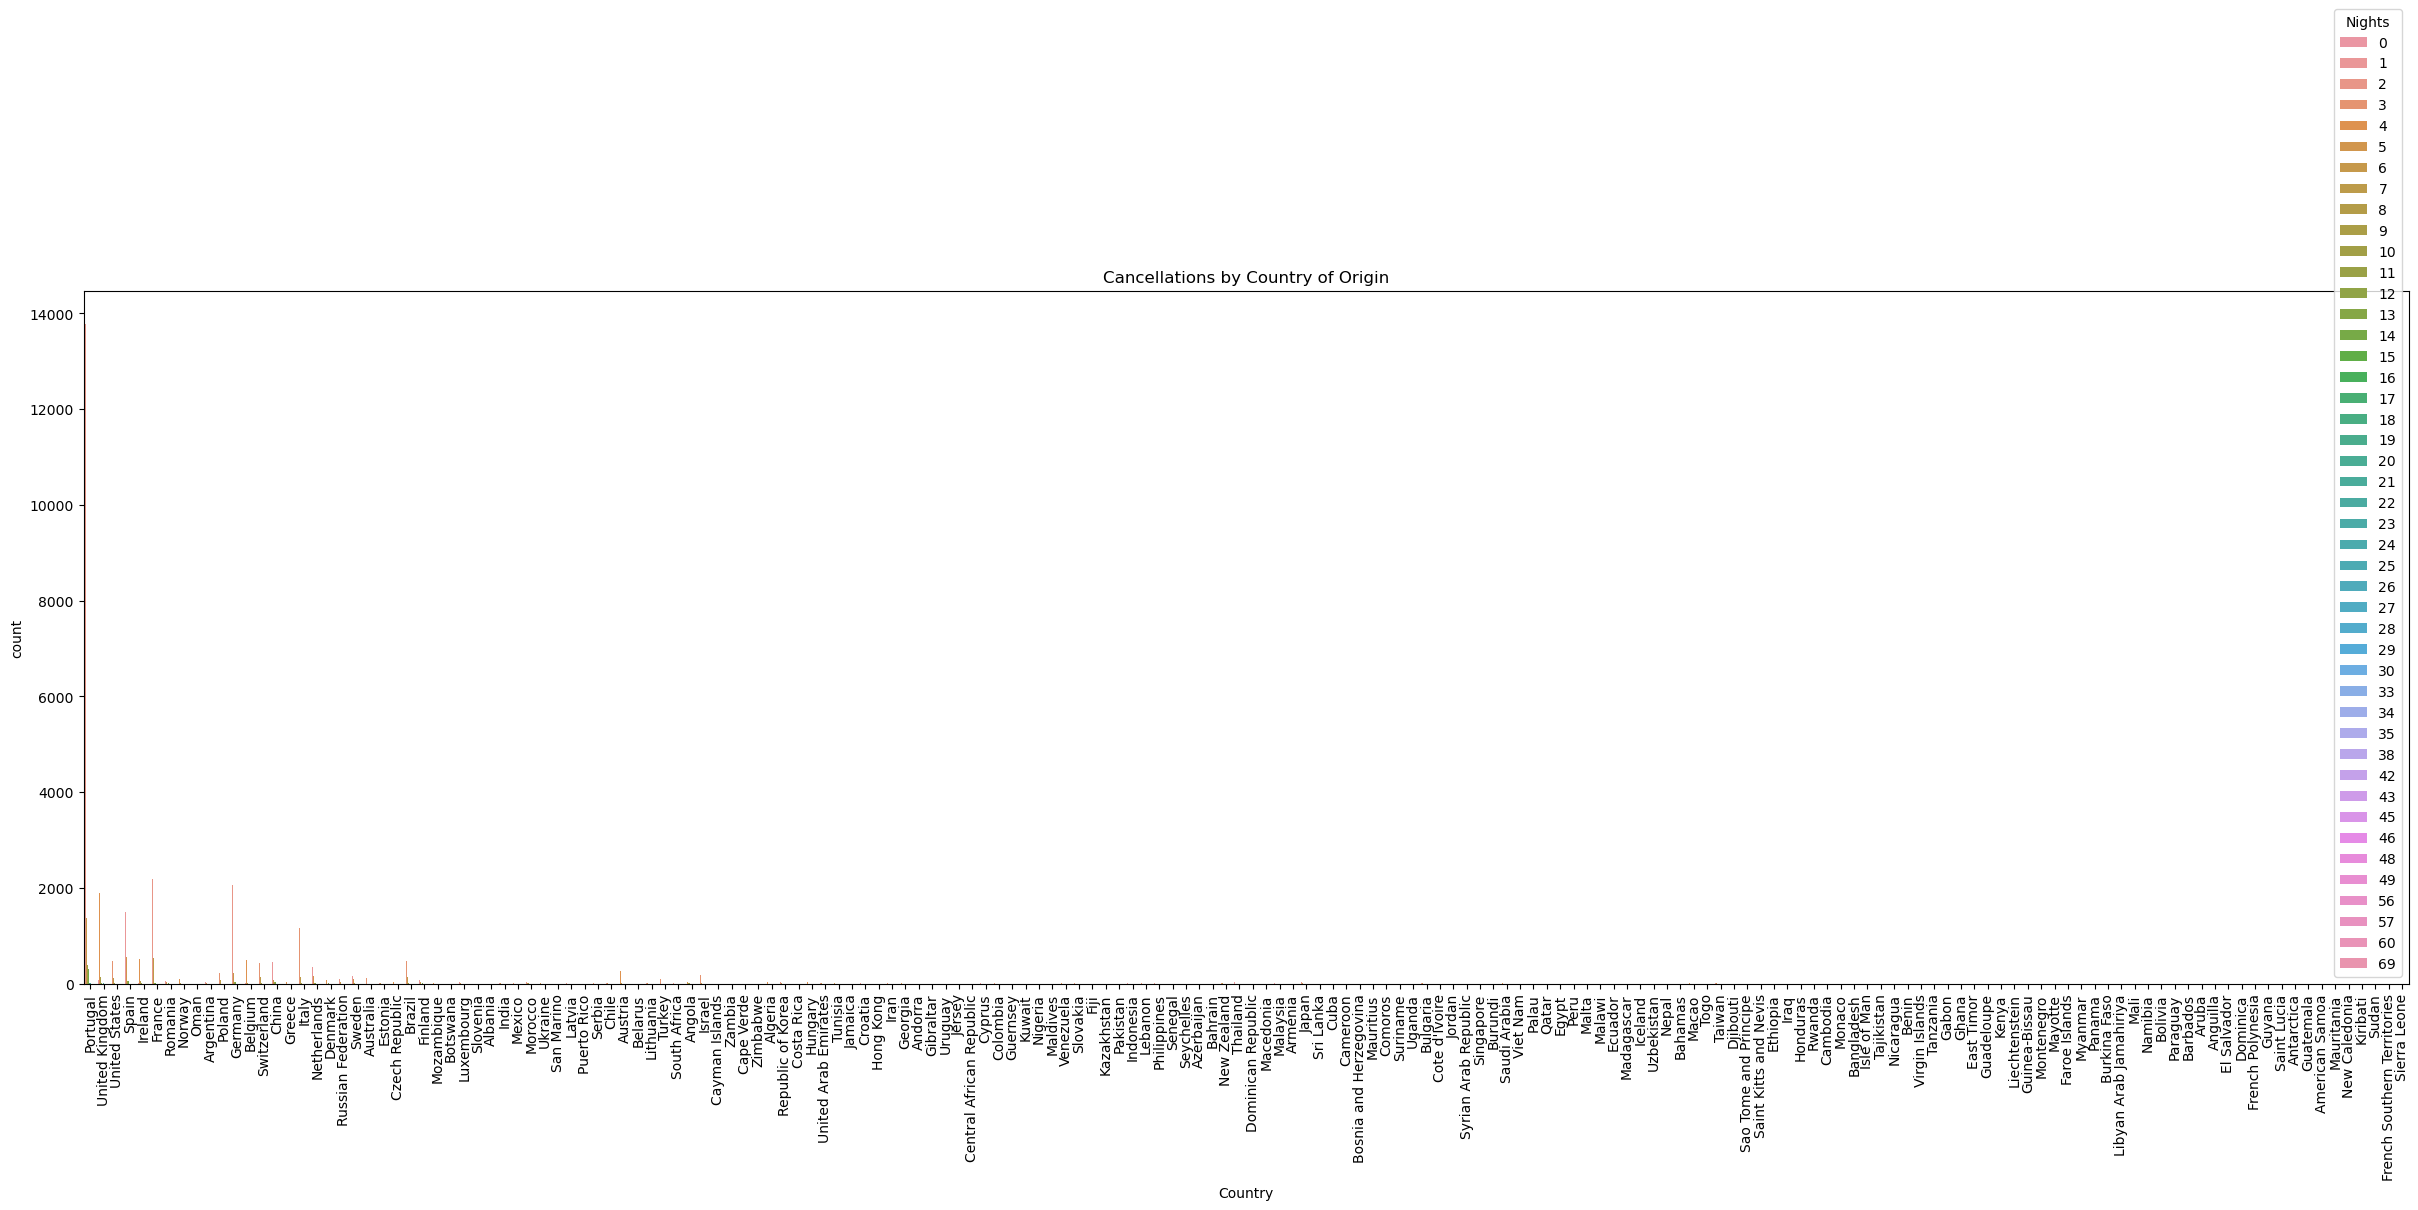

In [69]:
plt.figure(figsize=(30,9))
sns.countplot(x='Country', hue='Nights', data=Hotel_df)
plt.xticks(rotation=90)
plt.title('Cancellations by Country of Origin')
plt.show()

In [70]:
from scipy.stats import chi2_contingency, spearmanr

In [71]:
cancellation_cross_tab = pd.crosstab(Hotel_df['Country'], Hotel_df['Cancelled (0/1)'])

In [72]:
chi2,p,_,_ = chi2_contingency(cancellation_cross_tab)

In [73]:
chi2

10488.030852898293

In [74]:
p

0.0

**Therefore, since the P-value is less than 0.05, we reject the null hypothesis. In conclusion, there is no correlation between
the country of origin and 'Cancelation'**

In [75]:
corr, p_value = spearmanr(Hotel_df['Country'], Hotel_df['Nights'])

In [77]:
corr

nan

In [76]:
p

0.0

**Therefore, since the P-value is less than 0.05, we reject the null hypothesis. In conclusion, there is no correlation between
the country of origin and 'Extended stays'**

## Q6a

In [78]:
Hotel_df['Nights'].mean() #Average lenght of stay is 3 nights

3.4279001591423066

In [79]:
Hotel_df.groupby('Distribution Channel')['Nights'].mean() # average per Distribution channels

Distribution Channel
Corporate               2.380710
Direct                  3.194333
Offline Travel Agent    3.922346
Online Travel Agent     3.408332
Undefined               3.400000
Name: Nights, dtype: float64

In [80]:
Hotel_df.groupby('Customer Type')['Nights'].mean() # average per Customer Types

Customer Type
Contract           5.320658
Group              2.882149
Transient          3.447145
Transient-Party    3.064719
Name: Nights, dtype: float64

## Q6b

In [81]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [82]:
Hotel_df.dtypes

Booking ID                       int64
Hotel                           object
Booking Date            datetime64[ns]
Arrival Date            datetime64[ns]
Lead Time                        int64
Nights                           int64
Guests                           int64
Distribution Channel            object
Customer Type                   object
Country                         object
Deposit Type                    object
Avg Daily Rate                 float64
Status                          object
Status Update           datetime64[ns]
Cancelled (0/1)                  int64
Revenue                        float64
Revenue Loss                   float64
Month                           object
Year                             int32
Day                             object
dtype: object

In [83]:
Check_out_counts = Hotel_df[Hotel_df['Status']=='Check-Out'].groupby('Month')['Status'].value_counts()

In [85]:
Check_out_counts

Month      Status   
April      Check-Out     5565
August     Check-Out     5542
December   Check-Out     5234
February   Check-Out     8651
January    Check-Out    10747
July       Check-Out     5486
June       Check-Out     3928
March      Check-Out     6717
May        Check-Out     5301
November   Check-Out     5489
October    Check-Out     6976
September  Check-Out     5530
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

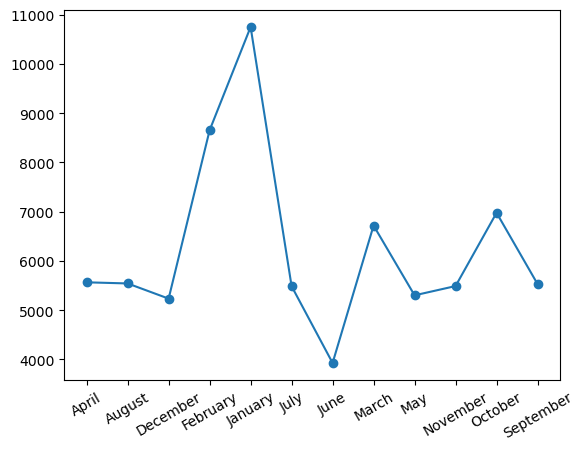

In [91]:
plt.plot(Check_out_counts.index.get_level_values('Month').astype(str), Check_out_counts.values, marker='o')
plt.xticks(rotation = 30)

In [92]:
daily_check_out_counts = Hotel_df['Status Update'].value_counts().sort_index()


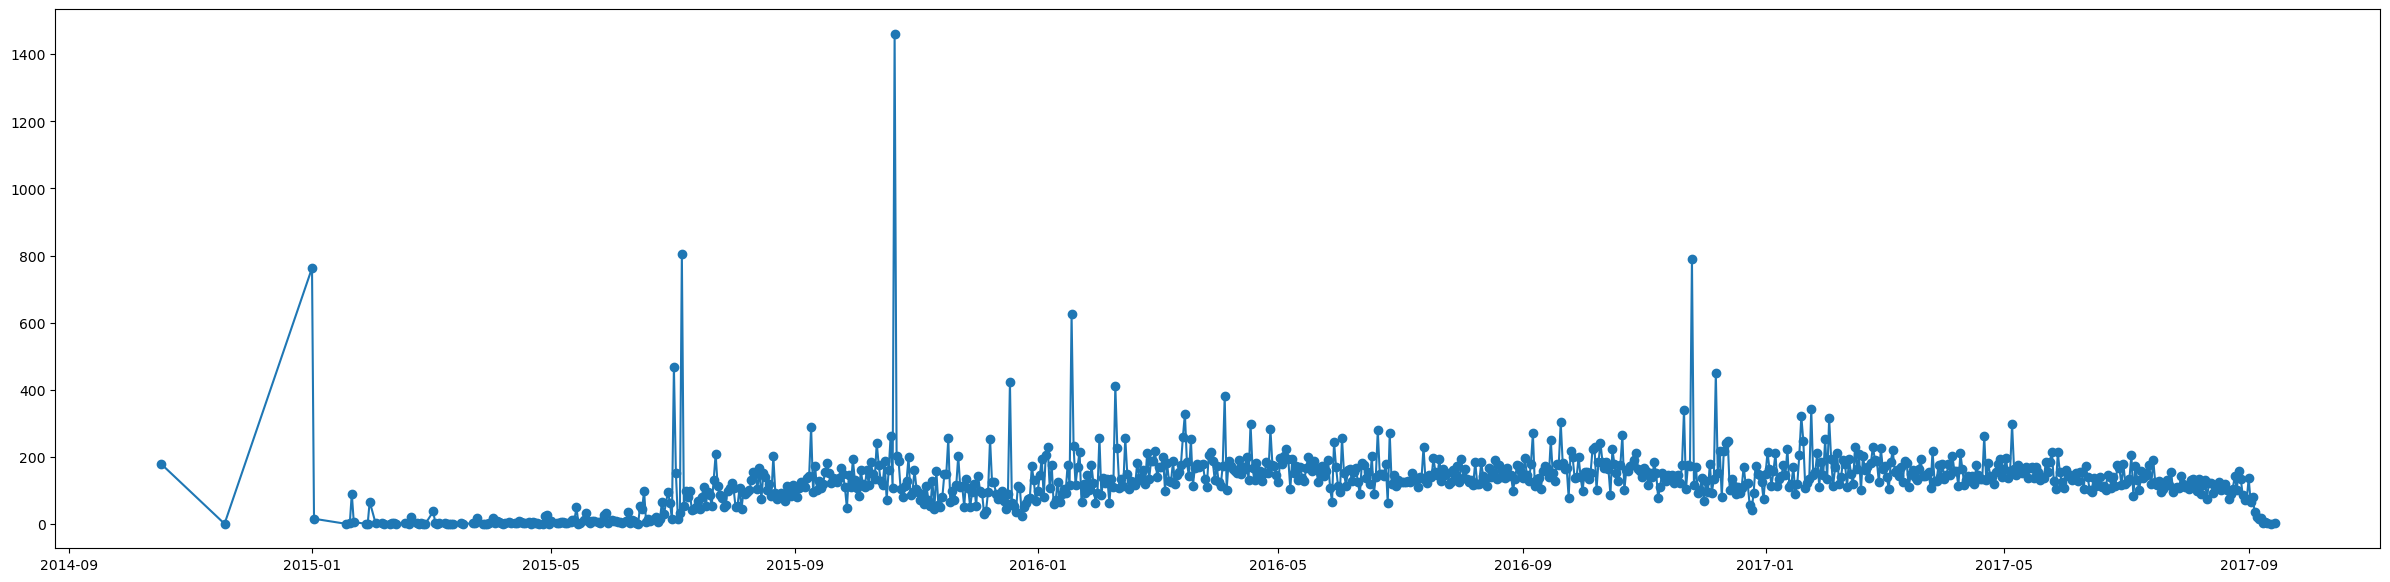

In [93]:
plt.figure(figsize=(30,7))
plt.plot(daily_check_out_counts.index, daily_check_out_counts.values, marker = 'o')

## Q7a

In [94]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year,Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014,Thursday
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013,Monday
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Wednesday
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Thursday
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015,Wednesday


In [95]:
Hotel_df[Hotel_df['Deposit Type']=='No Deposit'].groupby('Deposit Type')['Cancelled (0/1)'].value_counts() 
#We can see that more people cancelled when they did not make a deposit

Deposit Type  Cancelled (0/1)
No Deposit    0                  74947
              1                  29694
Name: count, dtype: int64

In [96]:
Hotel_df.groupby('Customer Type')['Deposit Type'].value_counts()

Customer Type    Deposit Type  
Contract         No Deposit         3530
                 Non Refundable      544
                 Refundable            2
Group            No Deposit          569
                 Refundable            8
Transient        No Deposit        76684
                 Non Refundable    12909
                 Refundable           20
Transient-Party  No Deposit        23858
                 Non Refundable     1134
                 Refundable          132
Name: count, dtype: int64

## Q8a

In [97]:
(Hotel_df['Distribution Channel'] == 'Corporate').value_counts(normalize=True)*100

Distribution Channel
False    94.407404
True      5.592596
Name: proportion, dtype: float64

In [98]:
Hotel_df[Hotel_df['Distribution Channel']=='Corporate'].groupby('Customer Type')['Avg Daily Rate'].mean()

Customer Type
Contract           45.962963
Group              80.135484
Transient          67.647262
Transient-Party    72.278440
Name: Avg Daily Rate, dtype: float64

## Q8b

In [99]:
monthly_corporate_counts = Hotel_df[Hotel_df['Distribution Channel'] == 'Corporate'].groupby('Month').size()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

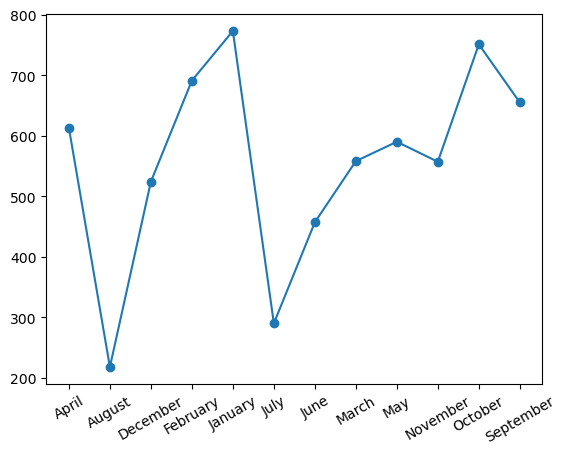

In [100]:
plt.plot(monthly_corporate_counts.index, monthly_corporate_counts.values, marker='o')
plt.xticks(rotation = 30)
# More cooperate bookings are done in January

## Q9a

In [101]:
Hotel_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Month,Year,Day
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,July,2014,Thursday
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,June,2013,Monday
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Wednesday
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,June,2015,Thursday
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,June,2015,Wednesday


<Axes: xlabel='Lead Time', ylabel='Revenue'>

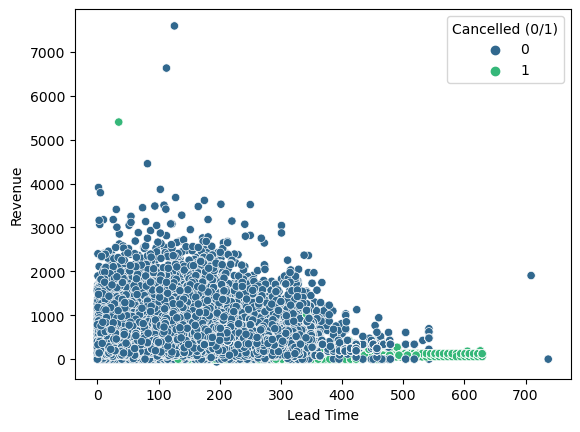

In [102]:
sns.scatterplot(x='Lead Time', y='Revenue', data=Hotel_df, hue='Cancelled (0/1)', palette='viridis')
#We notice that, more people cancelled their booking at lead times greater than 300

**Statistical Analysis**

In [103]:
corr,p_value=spearmanr(Hotel_df['Lead Time'], Hotel_df['Revenue'])

In [104]:
corr

0.08727193839456067

In [105]:
p_value # This is less than 0.05, therefore, They have no effect on each other

1.6334412837638636e-200

## Q9b

From the graph above we can see that, more revenue was gotten when the lead time was **less than** 400

## Q10a

In [106]:
Hotel_df['Distribution Channel'].value_counts()

Distribution Channel
Online Travel Agent     74072
Offline Travel Agent    23991
Direct                  14645
Corporate                6677
Undefined                   5
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online Travel Agent'),
  Text(3, 0, 'Offline Travel Agent'),
  Text(4, 0, 'Undefined')])

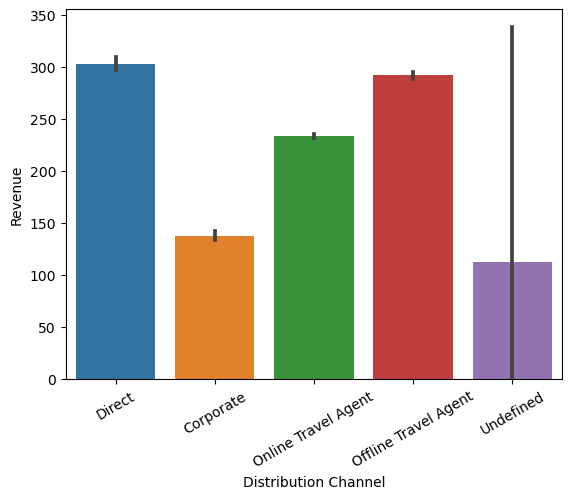

In [107]:
sns.barplot(data=Hotel_df, x=Hotel_df['Distribution Channel'], y=Hotel_df['Revenue'])
plt.xticks(rotation = 30)
#Offline gives more revenue

## Q10b

In [108]:
Hotel_df[Hotel_df['Distribution Channel']=='Online Travel Agent'].groupby('Cancelled (0/1)')['Revenue'].sum()

Cancelled (0/1)
0    15216706.52
1     2038416.99
Name: Revenue, dtype: float64

In [109]:
Hotel_df[Hotel_df['Distribution Channel'] == 'Offline Travel Agent'].groupby('Cancelled (0/1)')['Revenue'].sum()

Cancelled (0/1)
0    5625863.79
1    1367731.88
Name: Revenue, dtype: float64

In [110]:
Hotel_df.to_csv('Hotel data.csv')